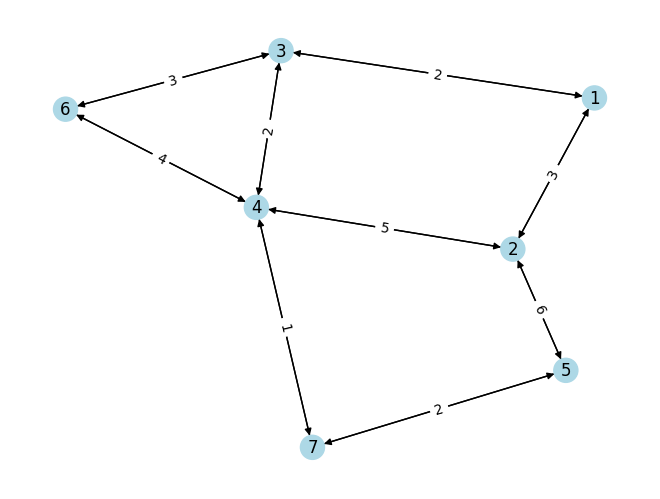

In [10]:
%run ./base.ipynb


In [11]:
import numpy as np

# Floyd-Warshall algorithm
def floyd_warshall(graph):
    node_count_padded = len(graph) + 1

    # Initialize the distance and predecessor matrices add one column and row so the node identifier match the matrix indices
    dist = np.array([[np.inf] * node_count_padded for _ in range(node_count_padded)])
    prev = np.array([[None] * node_count_padded for _ in range(node_count_padded)])

    for (u, v, data) in graph.edges(data=True):
        dist[u][v] = data["weight"]
        prev[v] = u

    for u in graph.nodes():
        dist[u][u] = 0
        prev[u] = u

    for k in graph.nodes():
        for i in graph.nodes():
            for j in graph.nodes():
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    prev[i][j] = prev[k][j]

    return (dist, prev)

dist, prev = floyd_warshall(G)

# Output:
print("Distance matrix:")
print(dist[1:, 1:])
print()
print("Predecessor matrix:")
print(prev[1:, 1:])


Distance matrix:
[[0. 3. 2. 4. 7. 5. 5.]
 [3. 0. 5. 5. 6. 8. 6.]
 [2. 5. 0. 2. 5. 3. 3.]
 [4. 5. 2. 0. 3. 4. 1.]
 [7. 6. 5. 3. 0. 7. 2.]
 [5. 8. 3. 4. 7. 0. 5.]
 [5. 6. 3. 1. 2. 5. 0.]]

Predecessor matrix:
[[1 1 1 3 7 3 4]
 [2 2 1 2 2 3 4]
 [3 1 3 3 7 3 4]
 [3 4 4 4 7 4 4]
 [3 5 4 7 5 4 5]
 [3 1 6 6 7 6 4]
 [3 4 4 7 7 4 7]]


In [12]:
# Find the shortest path between two nodes
def get_path(prev, u, v):
    # If there is no path between u and v return an empty list
    if prev[u][v] is None:
        return []
    # Reconstruct the path from u to v
    path = [v]
    while u != v:
        # Move to the next node
        v = prev[u][v]
        # Insert the node at the beginning of the list
        path.insert(0, v)
    return path

# Output:
print(get_path(prev, 1, 7))

[1, 3, 4, 7]


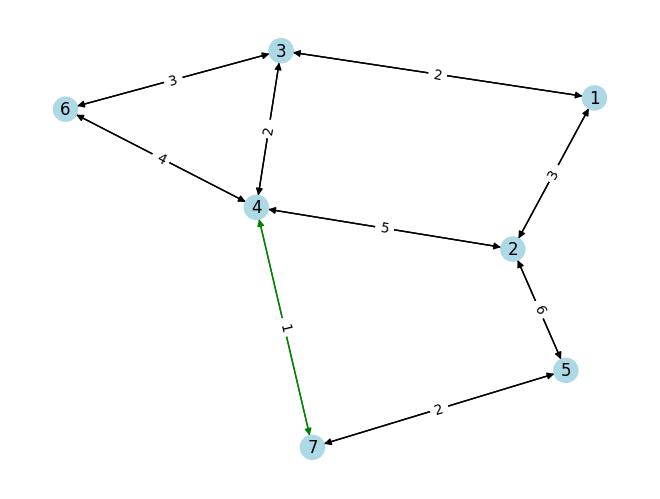

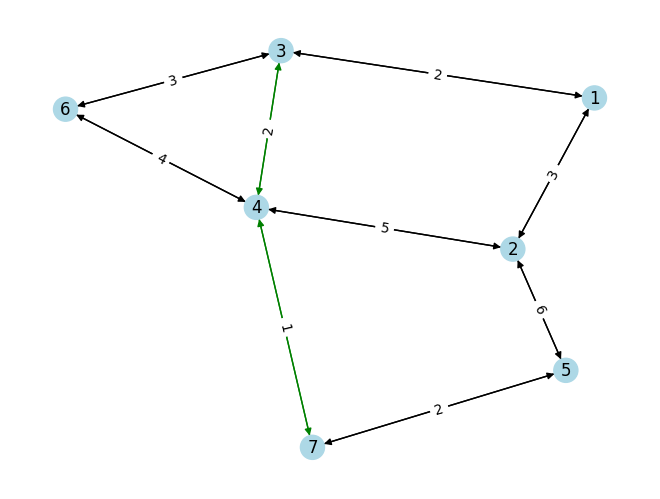

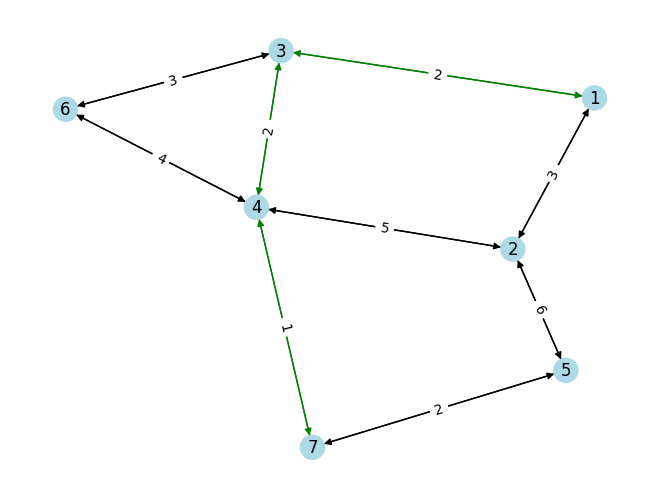

In [13]:
# Visualisierung
path = get_path(prev, 1, 7)
# Reverse the path to match reconstruction order
path.reverse()

for i in range(len(path) - 1):
    visualizer.color_edge((path[i + 1], path[i]), color="green")